In [4]:
import pandas as pd

#Load dataset with specified encoding
data = pd.read_csv(r"C:\Users\Lenovo\Downloads\sales_data_sample.csv", encoding="ISO-8859-1")

# Display the first few rows
print(data.head())


# Display the first few rows
print(data.head())

# Display the first few rows
print(data.head())

# Check for basic information and missing values
print(data.info())


   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC    NY   
1             59 rue de l'Abbaye           NaN

In [7]:
#Data Cleaning
# Convert 'ORDERDATE' to datetime format
data['ORDERDATE'] = pd.to_datetime(data['ORDERDATE'], errors='coerce')

# Fill missing values in 'STATE' and 'ADDRESSLINE2' with a placeholder (or keep NaNs based on analysis needs)
data['STATE'].fillna('Unknown', inplace=True)
data['ADDRESSLINE2'].fillna('N/A', inplace=True)

# Detect and handle outliers
data = data[(data['QUANTITYORDERED'] > 0) & (data['PRICEEACH'] > 0) & (data['SALES'] > 0)]


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8124\2750756709.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['STATE'].fillna('Unknown', inplace=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_8124\2750756709.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [8]:
#Data Aggregation
# Aggregate sales data by quarter and month
sales_by_quarter = data.groupby('QTR_ID').agg({
    'SALES': 'sum',
    'QUANTITYORDERED': 'sum'
}).reset_index()

sales_by_month = data.groupby('MONTH_ID').agg({
    'SALES': 'sum',
    'QUANTITYORDERED': 'sum'
}).reset_index()

# Aggregate sales data by product and region
sales_by_product = data.groupby('PRODUCTCODE').agg({
    'SALES': ['sum', 'mean'],
    'QUANTITYORDERED': 'sum'
}).reset_index()
sales_by_product.columns = ['PRODUCTCODE', 'Total Sales', 'Average Sales', 'Total Quantity Ordered']

sales_by_country = data.groupby('COUNTRY').agg({
    'SALES': 'sum'
}).reset_index()
sales_by_country.columns = ['COUNTRY', 'Total Sales']


In [9]:
#Analysis
# Total and average sales per product
total_sales = sales_by_product['Total Sales'].sum()
average_sales_per_product = sales_by_product['Average Sales'].mean()
print(f"Total Sales: {total_sales}")
print(f"Average Sales per Product: {average_sales_per_product}")

# Find the country with the highest sales performance
highest_sales_country = sales_by_country.sort_values(by='Total Sales', ascending=False).iloc[0]
print(f"Country with Highest Sales: {highest_sales_country['COUNTRY']} with ${highest_sales_country['Total Sales']} in sales")

# Analyze the impact of deal size on sales
deal_size_impact = data.groupby('DEALSIZE').agg({
    'SALES': 'mean',
    'QUANTITYORDERED': 'mean'
}).reset_index()
print(deal_size_impact)


Total Sales: 10032628.850000003
Average Sales per Product: 3527.7533031246858
Country with Highest Sales: USA with $3627982.83 in sales
  DEALSIZE        SALES  QUANTITYORDERED
0    Large  8293.753248        47.222930
1   Medium  4398.433699        37.947254
2    Small  2061.682800        30.525741


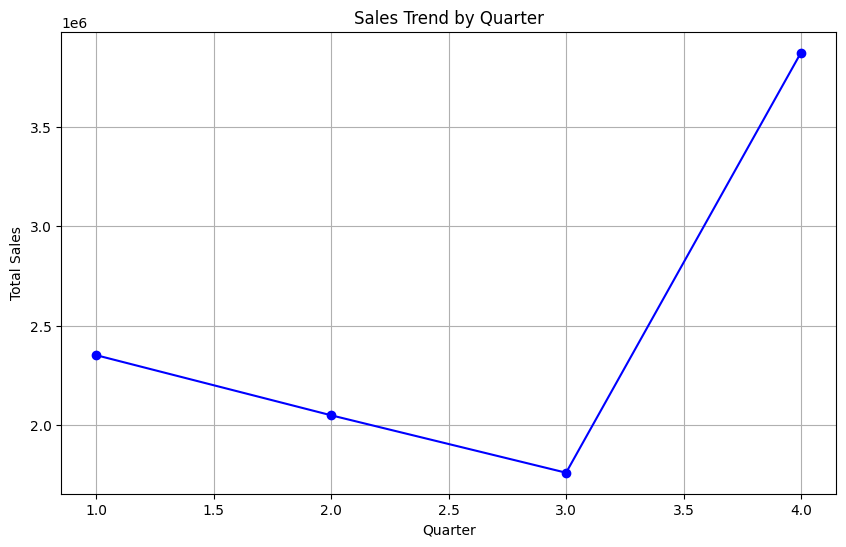

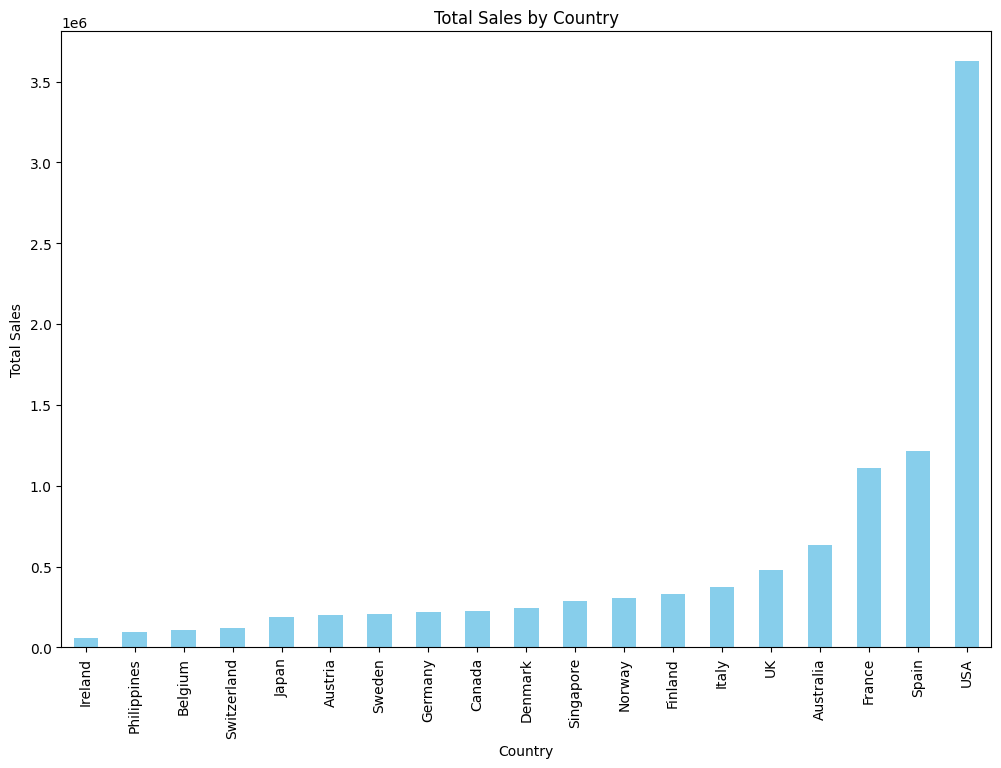

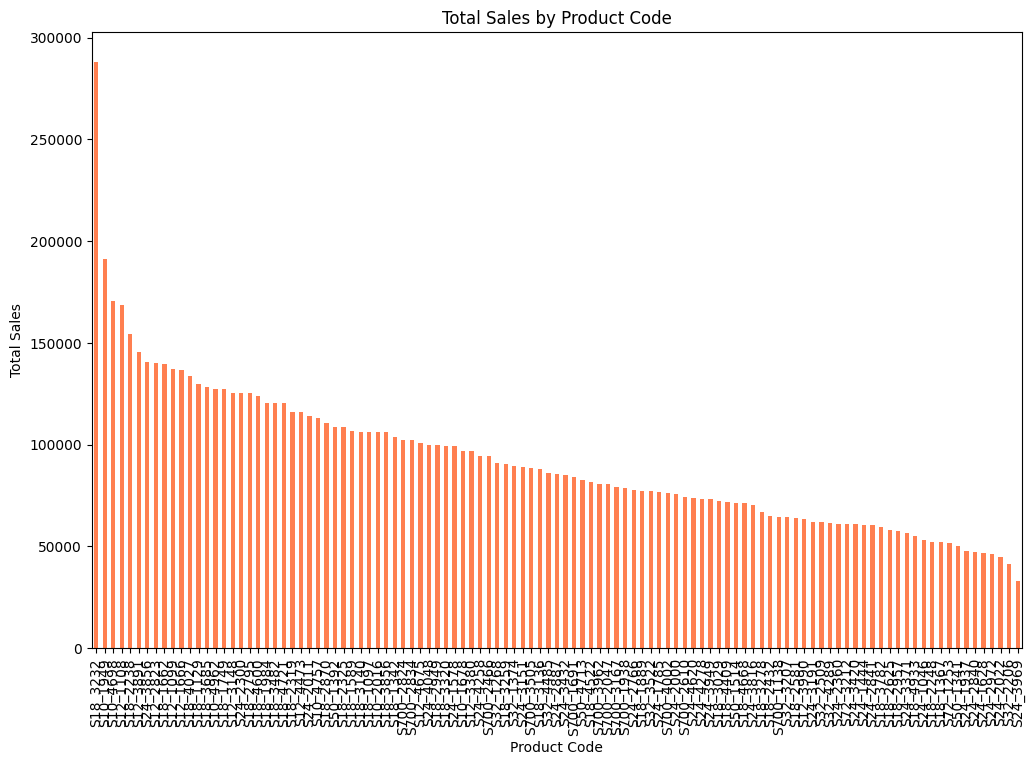

<Figure size 1000x600 with 0 Axes>

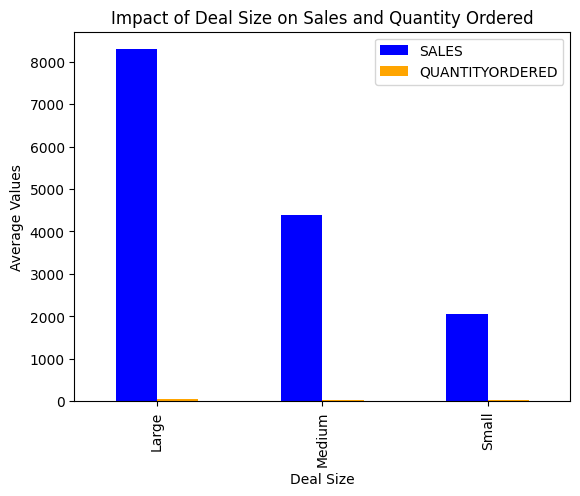

In [10]:
#Visualizations
import matplotlib.pyplot as plt

# Sales trends by quarter
plt.figure(figsize=(10, 6))
plt.plot(sales_by_quarter['QTR_ID'], sales_by_quarter['SALES'], marker='o', color='b')
plt.title("Sales Trend by Quarter")
plt.xlabel("Quarter")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

# Sales distribution across countries
plt.figure(figsize=(12, 8))
sales_by_country.set_index('COUNTRY')['Total Sales'].sort_values().plot(kind='bar', color='skyblue')
plt.title("Total Sales by Country")
plt.xlabel("Country")
plt.ylabel("Total Sales")
plt.show()

# Product performance in terms of total sales
plt.figure(figsize=(12, 8))
sales_by_product.set_index('PRODUCTCODE')['Total Sales'].sort_values(ascending=False).plot(kind='bar', color='coral')
plt.title("Total Sales by Product Code")
plt.xlabel("Product Code")
plt.ylabel("Total Sales")
plt.show()

# Impact of deal size on sales
plt.figure(figsize=(10, 6))
deal_size_impact.set_index('DEALSIZE')[['SALES', 'QUANTITYORDERED']].plot(kind='bar', color=['blue', 'orange'])
plt.title("Impact of Deal Size on Sales and Quantity Ordered")
plt.xlabel("Deal Size")
plt.ylabel("Average Values")
plt.show()
